In [5]:
2 ** 100

1267650600228229401496703205376

In [6]:
import time

In [15]:
지역 = input("어디 사는 가요? ")
print("{}에 살고 계시는 군요.".format(지역))

어디 사는 가요? seoul
seoul에 살고 계시는 군요.


In [9]:
print("hello")
time.sleep(5)  # 5초 딜레이
print("world")

hello
world


# Pandas 맛보기

In [17]:
import pandas as pd

pd.__version__

'0.23.4'

In [24]:
df_list = pd.read_html('https://finance.naver.com/marketindex/exchangeList.nhn')
df = df_list[0]
df.columns = [
    '통화명', '매매기준율', '현찰 - 사실 때', '현찰 - 파실 때',
    '송금 - 보내실 때', '송금 - 받으실 때', '미화환산율',
]
df = df.set_index('통화명')
print(df.shape)
df.head()  # 상위 5행만 보기

(44, 6)


매매기준율  현찰 - 사실 때  현찰 - 파실 때  송금 - 보내실 때  송금 - 받으실 때  미화환산율
통화명                                                                        
미국 USD         1142.90    1162.90    1122.90     1154.10     1131.70  1.000
유럽연합 EUR       1283.42    1308.96    1257.88     1296.25     1270.59  1.123
일본 JPY (100엔)  1026.26    1044.21    1008.31     1036.31     1016.21  0.898
중국 CNY          169.94     178.43     161.45      171.63      168.25  0.149
홍콩 HKD          145.60     148.46     142.74      147.05      144.15  0.127

In [25]:
df.to_excel("환율.xlsx")

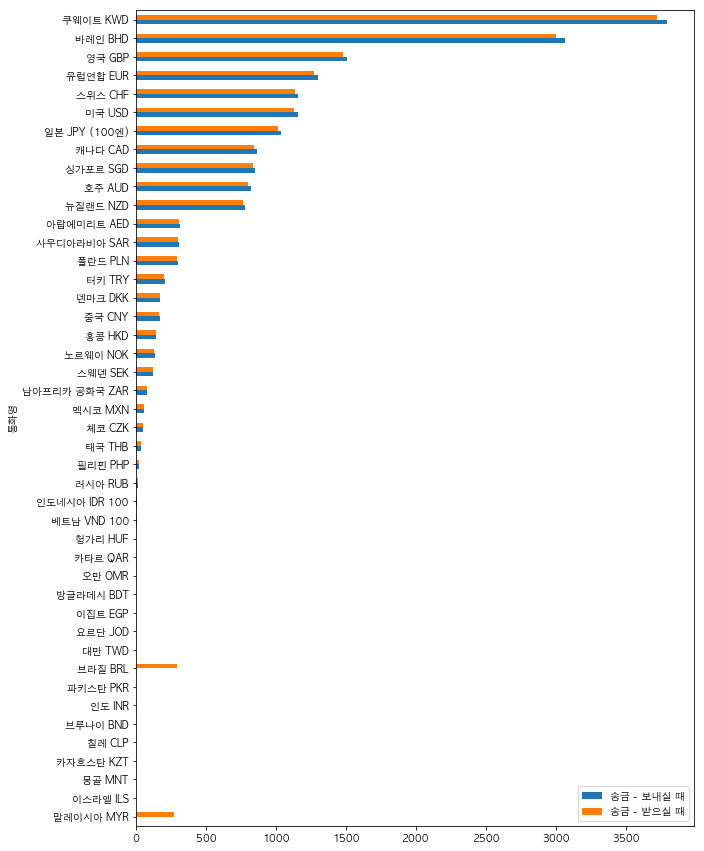

In [34]:
%matplotlib inline
from matplotlib import rc
from matplotlib import pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

rc('font', family='Malgun Gothic') # Windows 일 경우
# rc('font', family='AppleGothic') # Mac 일 경우

df2 = df.sort_values('송금 - 보내실 때', ascending=True)

names = ['송금 - 보내실 때', '송금 - 받으실 때']
df2[names].plot(kind='barh', figsize=(10, 15))

# Pandas 기본 자료구조

In [ ]:
학생성적 = [
    ['철수', 100, 90, 80],
    ['영희', 90, 70, 100],
]

## Series

In [37]:
mylist = [1, 2, 3, 1, 2, 3, 1, 2]
set(mylist)

{1, 2, 3}

In [38]:
series1 = pd.Series(['사과', '바나나', '딸기'])
series1

0     사과
1    바나나
2     딸기
dtype: object

In [39]:
series2 = pd.Series(['사과', '바나나', '딸기'],
                    index=[3, 2, 3])
series2

3     사과
2    바나나
3     딸기
dtype: object

In [41]:
pd.Series({3: '사과', 2: '바나나', 3: '딸기'})

3     딸기
2    바나나
dtype: object

In [44]:
series2[3]

3    사과
3    딸기
dtype: object

In [45]:
series2[2]

'바나나'

# 인터넷 데이터 읽어보기

In [67]:
코스닥_csv_url = "https://goo.gl/3p3bSG"
코피스_csv_url = "https://goo.gl/aUHznC"

In [52]:
df = pd.read_csv(코스닥_csv_url)
print(df.shape)
df.head()  # 상위 5행

(1231, 2)


종목명    종목코드
0     제일홀딩스    3380
1  하나금융9호스팩  261200
2    교보7호스팩  267320
3      보라티알  250000
4    한화수성스팩  265920

In [55]:
type(df)

pandas.core.frame.DataFrame

In [57]:
df['종목명'].head()  # 한 컬럼

0       제일홀딩스
1    하나금융9호스팩
2      교보7호스팩
3        보라티알
4      한화수성스팩
Name: 종목명, dtype: object

In [58]:
df.loc[3]

종목명       보라티알
종목코드    250000
Name: 3, dtype: object

## index 지정

In [69]:
df = pd.read_csv(코스닥_csv_url, index_col='종목명',
                 dtype={'종목코드': str})
print(df.shape)
df.head()  # 상위 5행

(1231, 1)


종목코드
종목명             
제일홀딩스     003380
하나금융9호스팩  261200
교보7호스팩    267320
보라티알      250000
한화수성스팩    265920

In [64]:
# df2 = df.set_index('종목명')
df.loc['보라티알']

종목코드    250000
Name: 보라티알, dtype: int64

In [65]:
df.columns

Index(['종목코드'], dtype='object')

In [66]:
df.index

Index(['제일홀딩스', '하나금융9호스팩', '교보7호스팩', '보라티알', '한화수성스팩', '매일유업', '삼양옵틱스',
       'IBKS제6호스팩', '필옵틱스', '미래에셋대우스팩1호',
       ...
       '에이티넘인베스트', '대동기어', '피에스텍', '코센', '카스', '하이록코리아', 'SBI인베스트먼트', '엠벤처투자',
       '제미니투자', '모헨즈'],
      dtype='object', name='종목명', length=1231)

In [68]:
int('003380')

3380

In [71]:
df = pd.read_csv("https://goo.gl/iDUKrL", index_col='곡일련번호')
print(df.shape)
df.head()

(100, 6)


순위                        앨범                                    곡명  \
곡일련번호                                                                          
31346009   1                        삐삐                                    삐삐   
31344113   2                   시간이 들겠지                 시간이 들겠지 (Feat. Colde)   
31340985   3       쇼미더머니 777 Episode 1  Good Day (Feat. 팔로알토) (Prod. 코드 쿤스트)   
31316695   4    하루도 그대를 사랑하지 않은 적이 없었다                하루도 그대를 사랑하지 않은 적이 없었다   
31266290   5  LOVE YOURSELF 結 `Answer`                                  IDOL   

             가수                                           커버이미지_주소     좋아요  
곡일련번호                                                                       
31346009    아이유  https://cdnimg.melon.co.kr/cm/album/images/102...   61528  
31344113     로꼬  https://cdnimg.melon.co.kr/cm/album/images/102...   48331  
31340985   pH-1  https://cdnimg.melon.co.kr/cm/album/images/102...   54022  
31316695    임창정  https://cdnimg.melon.co.kr/cm/album/images/102...   97984  
31266290  방탄소년단  https://cdnimg.melon.co.kr/cm/album/images/101...  173279

In [77]:
top10_series = df['가수'].value_counts().sort_values(ascending=False)[:10]
top10_series

방탄소년단              14
뉴이스트 W              8
Wanna One (워너원)     5
멜로망스                4
iKON                3
EXO                 3
폴킴                  2
닐로 (Nilo)           2
로꼬                  2
비투비                 2
Name: 가수, dtype: int64

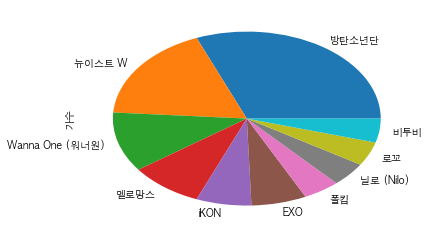

In [79]:
top10_series.plot(kind='pie')

## 멜론 차트 데이터

In [80]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 멜론 차트 페이지의 HTML 응답 문자열을 획득합니다.

url = 'http://www.melon.com/chart/index.htm'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
}
html = requests.get(url, headers=headers).text

# HTML 응답 문자열로부터, 필요한 태그 정보를 추출하기 위해, BeautifulSoup4 객체를 생성합니다.
soup = BeautifulSoup(html, 'html.parser')

In [83]:
# BeautifulSoup4 객체를 통해 노래 정보를 추출해냅니다.
song_list = []
for song_tag in soup.select('#tb_list tbody tr'):
    곡일련번호 = song_tag['data-song-no']
    커버이미지_주소 = song_tag.select_one('img')['src']
    곡명 = song_tag.select_one('a[href*=playSong]').text
    가수 = song_tag.select_one('a[href*=goArtistDetail]').text
    앨범 = song_tag.select_one('a[href*=goAlbumDetail]')['title']
    순위 = song_tag.select_one('.rank').text
    song = {
        '곡일련번호': 곡일련번호, '순위': 순위, '곡명': 곡명,
        '가수': 가수, '앨범': 앨범, '커버이미지_주소': 커버이미지_주소,
    }
    song_list.append(song)
    
song_list

[{'곡일련번호': '31709523',
  '순위': '1',
  '곡명': '나만, 봄',
  '가수': '볼빨간사춘기',
  '앨범': '사춘기집Ⅰ 꽃기운',
  '커버이미지_주소': 'https://cdnimg.melon.co.kr/cm/album/images/102/68/898/10268898_500.jpg/melon/resize/120/quality/80/optimize'},
 {'곡일련번호': '31717822',
  '순위': '2',
  '곡명': 'Kill This Love',
  '가수': 'BLACKPINK',
  '앨범': 'KILL THIS LOVE',
  '커버이미지_주소': 'https://cdnimg.melon.co.kr/cm/album/images/102/70/288/10270288_500.jpg/melon/resize/120/quality/80/optimize'},
 {'곡일련번호': '31688205',
  '순위': '3',
  '곡명': '사계 (Four Seasons)',
  '가수': '태연 (TAEYEON)',
  '앨범': '사계 (Four Seasons)',
  '커버이미지_주소': 'https://cdnimg.melon.co.kr/cm/album/images/102/65/079/10265079_500.jpg/melon/resize/120/quality/80/optimize'},
 {'곡일련번호': '31709524',
  '순위': '4',
  '곡명': '별 보러 갈래?',
  '가수': '볼빨간사춘기',
  '앨범': '사춘기집Ⅰ 꽃기운',
  '커버이미지_주소': 'https://cdnimg.melon.co.kr/cm/album/images/102/68/898/10268898_500.jpg/melon/resize/120/quality/80/optimize'},
 {'곡일련번호': '31706215',
  '순위': '5',
  '곡명': '사월이 지나면 우리 헤어져요 (Beautiful goodbye)',

In [85]:
df = pd.DataFrame(song_list).set_index('곡일련번호')
print(df.shape)
df.head()

(100, 5)


가수                                   곡명 순위  \
곡일련번호                                                            
31709523        볼빨간사춘기                                나만, 봄  1   
31717822     BLACKPINK                       Kill This Love  2   
31688205  태연 (TAEYEON)                    사계 (Four Seasons)  3   
31709524        볼빨간사춘기                             별 보러 갈래?  4   
31706215      첸 (CHEN)  사월이 지나면 우리 헤어져요 (Beautiful goodbye)  5   

                                      앨범  \
곡일련번호                                      
31709523                       사춘기집Ⅰ 꽃기운   
31717822                  KILL THIS LOVE   
31688205               사계 (Four Seasons)   
31709524                       사춘기집Ⅰ 꽃기운   
31706215  사월, 그리고 꽃 - The 1st Mini Album   

                                                   커버이미지_주소  
곡일련번호                                                        
31709523  https://cdnimg.melon.co.kr/cm/album/images/102...  
31717822  https://cdnimg.melon.co.kr/cm/album/images/102...  
31688205  https://cdnimg.melon.co.kr/cm/album/images/102...  
31709524  https://cdnimg.melon.co.kr/cm/album/images/102...  
31706215  https://cdnimg.melon.co.kr/cm/album/images/102...

In [107]:
# 추출해낸 곡 정보를 Pandas의 DataFrame화 시킵니다.
columns = ['순위', '곡일련번호', '앨범', '곡명', '가수', '커버이미지_주소']

song_df = pd.DataFrame(song_list, columns=columns).set_index('곡일련번호')
# song_df의 인덱스가 노래 id 목록입니다.

song_id_list = song_df.index  # 순회가능한 객체 (Iterable Object)
# 노래별 "좋아요" 정보는 별도로 요청. 노래 id 목록을 인자로 넘겨서 좋아요 정보를 획득

url = 'http://www.melon.com/commonlike/getSongLike.json'
params = {'contsIds': song_id_list}
result = requests.get(url, headers=headers, params=params).json()
like_dict = {  # Dict Comprehension
    str(song['CONTSID']):song['SUMMCNT']
    for song in result['contsLike'] }
# 좋아요 정보를 song_df에 새로운 필드로 추가합니다.

song_df['좋아요'] = pd.Series(like_dict)

In [97]:
print(song_df.shape)
song_df.head()

(100, 6)


순위                              앨범  \
곡일련번호                                         
31709523  1                       사춘기집Ⅰ 꽃기운   
31717822  2                  KILL THIS LOVE   
31688205  3               사계 (Four Seasons)   
31709524  4                       사춘기집Ⅰ 꽃기운   
31706215  5  사월, 그리고 꽃 - The 1st Mini Album   

                                           곡명            가수  \
곡일련번호                                                         
31709523                                나만, 봄        볼빨간사춘기   
31717822                       Kill This Love     BLACKPINK   
31688205                    사계 (Four Seasons)  태연 (TAEYEON)   
31709524                             별 보러 갈래?        볼빨간사춘기   
31706215  사월이 지나면 우리 헤어져요 (Beautiful goodbye)      첸 (CHEN)   

                                                   커버이미지_주소     좋아요  
곡일련번호                                                                
31709523  https://cdnimg.melon.co.kr/cm/album/images/102...   67637  
31717822  https://cdnimg.melon.co.kr/cm/album/images/102...   47976  
31688205  https://cdnimg.melon.co.kr/cm/album/images/102...  115421  
31709524  https://cdnimg.melon.co.kr/cm/album/images/102...   36918  
31706215  https://cdnimg.melon.co.kr/cm/album/images/102...   86801

In [98]:
mylist = []
for i in range(10):
    mylist.append(i ** 2)
mylist

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [99]:
[i**2 for i in range(10)]  # List Comprehension

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [101]:
{i%5 for i in range(100)}  # Set Comprehension

{0, 1, 2, 3, 4}

In [103]:
{i: i%5 for i in range(10)}  # Dict Comprehension

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 0, 6: 1, 7: 2, 8: 3, 9: 4}

In [105]:
(i**2 for i in range(10))  # Generator Expression

<generator object <genexpr> at 0x11693fa20>